In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


data = pd.read_csv('/content/Merged_all.csv')


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['CELL_KEY_H'] = data['CELL_KEY_H'].astype('category')
# Fit and transform the label encoder on the 'CELL_KEY_H' column
data['CELL_KEY_H'] = le.fit_transform(data['CELL_KEY_H'])


# Define input features (X) and target variable (y)
X = data.drop(['CELL_AZIMUTH'], axis=1)  # Drop the target variable
y = data['CELL_AZIMUTH']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the updated ANN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),   # Input layer
    layers.Dense(128, activation='relu'),      # Hidden layers with ReLU activation
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)                            # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss='mean_squared_error')

# Train the model for more epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss:.2f}')

# Make predictions on the dataset
y_pred = model.predict(X)



Epoch 1/10
3851/3851 [==============================] - 7s 2ms/step - loss: 6215.9551 - val_loss: 5338.2622
Epoch 2/10
3851/3851 [==============================] - 7s 2ms/step - loss: 5556.5464 - val_loss: 5290.3833
Epoch 3/10
3851/3851 [==============================] - 6s 2ms/step - loss: 5371.9038 - val_loss: 5140.8936
Epoch 4/10
3851/3851 [==============================] - 7s 2ms/step - loss: 5700.8784 - val_loss: 5119.6606
Epoch 5/10
3851/3851 [==============================] - 6s 2ms/step - loss: 5206.1245 - val_loss: 5038.6880
Epoch 6/10
3851/3851 [==============================] - 7s 2ms/step - loss: 5168.5186 - val_loss: 5240.9751
Epoch 7/10
3851/3851 [==============================] - 6s 1ms/step - loss: 5030.1885 - val_loss: 4897.9922
Epoch 8/10
3851/3851 [==============================] - 7s 2ms/step - loss: 5961.7612 - val_loss: 5166.9883
Epoch 9/10
3851/3851 [==============================] - 6s 1ms/step - loss: 5089.5938 - val_loss: 5048.6089
Epoch 10/10
1204/1204 [=====

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2:.4f}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

1204/1204 [==============================] - 1s 924us/step
R-squared (R²): 0.4253
Mean Squared Error (MSE): 4944.2375


1204/1204 [==============================] - 1s 987us/step


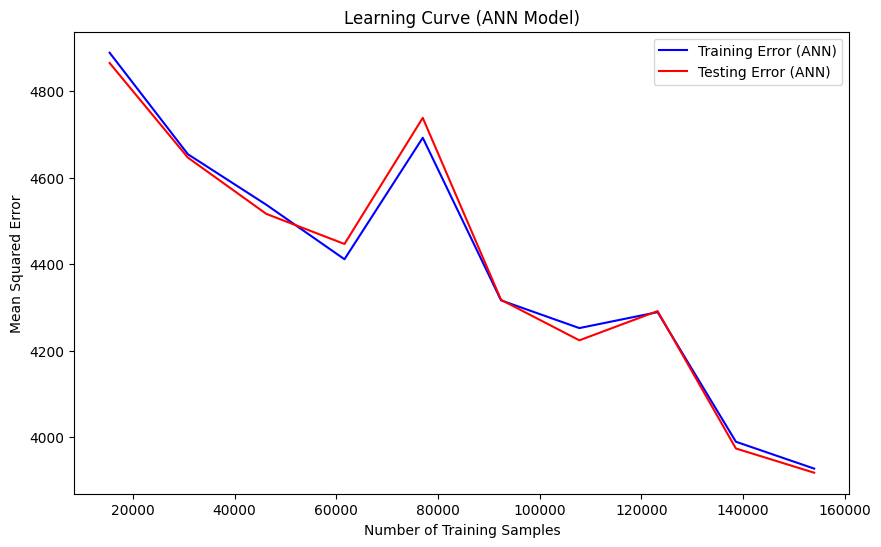

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

training_sizes = np.linspace(0.1, 1.0, 10)

train_errors_ann = []
test_errors_ann = []

for size in training_sizes:
    num_samples = int(len(X_train) * size)

    # Fit the model to the training data
    model.fit(X_train[:num_samples], y_train[:num_samples], epochs=5, batch_size=32, verbose=0)

    # Predict on both training and testing data
    y_train_pred_ann = model.predict(X_train)
    y_test_pred_ann = model.predict(X_test)

    # Calculate Mean Squared Error for training and testing data
    train_mse_ann = mean_squared_error(y_train, y_train_pred_ann)
    test_mse_ann = mean_squared_error(y_test, y_test_pred_ann)

    # Append errors to the lists
    train_errors_ann.append(train_mse_ann)
    test_errors_ann.append(test_mse_ann)

# Plot learning curve for ANN
plt.figure(figsize=(10, 6))
plt.plot(training_sizes * len(X_train), train_errors_ann, label='Training Error (ANN)', color='blue')
plt.plot(training_sizes * len(X_train), test_errors_ann, label='Testing Error (ANN)', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (ANN Model)')
plt.legend()
plt.show()